# Julia for Data Analysis

## Bogumił Kamiński

# Lecture 13. Advanced transformations of data frames

## Getting and pre-processing the police stop data set

### Loading all required packages

In [1]:
using CSV
using CategoricalArrays
using DataFrames
using DataFramesMeta
using Dates
using Distributions
import Downloads
using FreqTables
using GLM
using Plots
using Random
using ROCAnalysis
using SHA
using Statistics
import ZipFile

### Introducing the @chain macro

In [2]:
sqrt(sum(1:8))

6.0

In [3]:
@chain 1:8 begin
    sum
    sqrt
end

6.0

In [4]:
@chain 1:8 begin
    sum(_)
    sqrt(_)
end

6.0

In [5]:
string(3, string(1, 2))

"312"

In [6]:
@chain 1 begin
    string(2)
    string(3, _)
end

"312"

### Getting the police stop data set

In [7]:
url_zip = "https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ky_owensboro_2020_04_01.csv.zip";
local_zip = "owensboro.zip";

In [8]:
isfile(local_zip) || Downloads.download(url_zip, local_zip)

true

In [9]:
isfile(local_zip)

true

In [10]:
open(sha256, local_zip) == [0x14, 0x3b, 0x7d, 0x74, 0xbc, 0x15, 0x74, 0xc5,
                            0xf8, 0x42, 0xe0, 0x3f, 0x8f, 0x08, 0x88, 0xd5,
                            0xe2, 0xa8, 0x13, 0x24, 0xfd, 0x4e, 0xab, 0xde,
                            0x02, 0x89, 0xdd, 0x74, 0x3c, 0xb3, 0x5d, 0x56]

true

In [11]:
archive = ZipFile.Reader(local_zip)

ZipFile.Reader for IOStream(<file owensboro.zip>) containing 1 files:

uncompressedsize method  mtime            name
----------------------------------------------
         1595853 Deflate 2020-04-01 07-58 ky_owensboro_2020_04_01.csv


In [12]:
owensboro = @chain archive begin
                only(_.files)
                read
                CSV.read(DataFrame; missingstring="NA")
            end

,raw_row_number,date,time,location
,Int64,Date,Time,String
1,1,2016-08-04,13:52:00,"1016 HALL ST, OWENSBORO, KY, 42301"
2,2,2016-04-03,01:48:00,"W PARRISH AVE/BYPASS, OWENSBORO, KY, 42301"
3,3,2015-09-13,04:57:00,"2511 HWY 144 ST, OWENSBORO, KY, 42303"
4,4,2016-01-05,13:16:00,"CARTER RD & BITTEL RD, OWENSBORO, KY, 42301"
5,5,2016-04-06,02:15:00,"FREDERICA ST & FAIRFAX DR, OWENSBORO, KY, 42301"
6,6,2015-11-05,23:15:00,"FREDERICA ST AND WASHINGTON AVE, OWENSBORO, KY, 42303"
7,7,2016-02-14,02:40:00,"1301 FREDERICA ST, OWENSBORO, KY, 42301"
8,8,2016-02-09,16:59:00,"1300 MCFARLAND AVE, OWENSBORO, KY, 42301"
9,9,2016-04-16,23:14:00,"700 CRABTREE AVE, OWENSBORO, KY, 42301"


In [13]:
close(archive)

In [14]:
summary(owensboro)

"6921×18 DataFrame"

In [15]:
describe(owensboro, :nunique, :nmissing, :eltype)

,variable,nunique,nmissing,eltype
,Symbol,Union…,Int64,Type
1,raw_row_number,,0,Int64
2,date,726,0,Date
3,time,1352,0,Time
4,location,4481,0,String
5,lat,,0,Float64
6,lng,,9,"Union{Missing, Float64}"
7,sector,10,10,"Union{Missing, String15}"
8,subject_age,,3,"Union{Missing, Int64}"
9,subject_race,4,18,"Union{Missing, String31}"


In [16]:
select!(owensboro, :date, :type, :arrest_made, :violation)

,date,type,arrest_made,violation
,Date,String15?,Bool,String
1,2016-08-04,pedestrian,1,"POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); DRUG PARAPHERLIA - BUY/POSSESS"
2,2016-04-03,vehicular,0,FAILURE TO ILLUMITE HEAD LAMPS; NO OPERATORS-MOPED LICENSE; NO REGISTRATION PLATES
3,2015-09-13,vehicular,1,"NO TAIL LAMPS; OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF; POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; VIOLATION UNKNOWN"
4,2016-01-05,vehicular,1,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"
5,2016-04-06,vehicular,0,OPERATING ON SUS OR REV OPER LICENSE
6,2015-11-05,vehicular,0,FAILURE TO WEAR SEAT BELTS
7,2016-02-14,vehicular,1,OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF
8,2016-02-09,vehicular,0,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; LICENSE TO BE IN POSSESSION
9,2016-04-16,vehicular,1,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE; POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; FAILURE TO WEAR SEAT BELTS"


In [17]:
summary(owensboro)

"6921×4 DataFrame"

In [18]:
describe(owensboro, :nunique, :nmissing, :eltype)

,variable,nunique,nmissing,eltype
,Symbol,Union…,Int64,Type
1,date,726,0,Date
2,type,2,42,"Union{Missing, String15}"
3,arrest_made,,0,Bool
4,violation,1979,0,String


### Comparison of functions that perform operations on columns

In [19]:
df = DataFrame(id=[1, 2, 1, 2], v=1:4)

,id,v
,Int64,Int64
1,1,1
2,2,2
3,1,3
4,2,4


In [20]:
combine(df, :v => sum => :sum)

,sum
,Int64
1,10


In [21]:
transform(df, :v => sum => :sum)

,id,v,sum
,Int64,Int64,Int64
1,1,1,10
2,2,2,10
3,1,3,10
4,2,4,10


In [22]:
select(df, :v => sum => :sum)

,sum
,Int64
1,10
2,10
3,10
4,10


In [23]:
gdf = groupby(df, :id)

,id,v
,Int64,Int64
1,1,1
2,1,3
,id,v
,Int64,Int64
1,2,2
2,2,4


In [24]:
combine(gdf, :v => sum => :sum)

,id,sum
,Int64,Int64
1,1,4
2,2,6


In [25]:
transform(gdf, :v => sum => :sum)

,id,v,sum
,Int64,Int64,Int64
1,1,1,4
2,2,2,6
3,1,3,4
4,2,4,6


In [26]:
select(gdf, :v => sum => :sum)

,id,sum
,Int64,Int64
1,1,4
2,2,6
3,1,4
4,2,6


### Short forms of operation specification syntax

In [27]:
select(df,
       :v => identity => :v1,
       :v => identity,
       :v => :v2,
       :v)

,v1,v_identity,v2,v
,Int64,Int64,Int64,Int64
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4


## Investigating the violation column

### Finding most frequent violations

In [28]:
owensboro.violation

6921-element Vector{String}:
 "POSS CONT SUB 1ST DEG, 1ST OFF " ⋯ 18 bytes ⋯ " DRUG PARAPHERLIA - BUY/POSSESS"
 "FAILURE TO ILLUMITE HEAD LAMPS;" ⋯ 20 bytes ⋯ "LICENSE; NO REGISTRATION PLATES"
 "NO TAIL LAMPS; OPER MTR VEHICLE" ⋯ 136 bytes ⋯ "EC, 1ST OFF; VIOLATION UNKNOWN"
 "OPER MTR VEH U/INFLU ALC/DRUGS/" ⋯ 49 bytes ⋯ " LICENSE - 1ST OFF (AGG CIRCUM)"
 "OPERATING ON SUS OR REV OPER LICENSE"
 "FAILURE TO WEAR SEAT BELTS"
 "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"
 "DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; LICENSE TO BE IN POSSESSION"
 "OPER MTR VEH U/INFLU ALC/DRUGS/" ⋯ 183 bytes ⋯ "FF; FAILURE TO WEAR SEAT BELTS"
 "OPER MTR VEHICLE U/INFLUENCE AL" ⋯ 77 bytes ⋯ " DRUG PARAPHERLIA - BUY/POSSESS"
 "OPER MTR VEHICLE U/INFLUENCE AL" ⋯ 86 bytes ⋯ "NCE; NO OPERATORS-MOPED LICENSE"
 "NO REGISTRATION PLATES; FAILURE" ⋯ 23 bytes ⋯ "ARD; NO OPERATORS-MOPED LICENSE"
 "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"
 ⋮
 "NO REGISTRATION PLATES; FAILURE TO PRODUCE

In [29]:
violation_list = [strip.(split(x, ";")) for x in owensboro.violation]

6921-element Vector{Vector{SubString{String}}}:
 ["POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)", "DRUG PARAPHERLIA - BUY/POSSESS"]
 ["FAILURE TO ILLUMITE HEAD LAMPS", "NO OPERATORS-MOPED LICENSE", "NO REGISTRATION PLATES"]
 ["NO TAIL LAMPS", "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF", "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)", "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF", "VIOLATION UNKNOWN"]
 ["OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND", "DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"]
 ["OPERATING ON SUS OR REV OPER LICENSE"]
 ["FAILURE TO WEAR SEAT BELTS"]
 ["OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"]
 ["DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT", "LICENSE TO BE IN POSSESSION"]
 ["OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND", "DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE", "POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED", "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF

In [30]:
violation_flat = reduce(vcat, violation_list)

13555-element Vector{SubString{String}}:
 "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
 "DRUG PARAPHERLIA - BUY/POSSESS"
 "FAILURE TO ILLUMITE HEAD LAMPS"
 "NO OPERATORS-MOPED LICENSE"
 "NO REGISTRATION PLATES"
 "NO TAIL LAMPS"
 "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"
 "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
 "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
 "VIOLATION UNKNOWN"
 "OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND"
 "DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"
 "OPERATING ON SUS OR REV OPER LICENSE"
 ⋮
 "FAILURE TO WEAR SEAT BELTS"
 "SPEEDING 11 MPH OVER LIMIT"
 "NO REGISTRATION RECEIPT"
 "SPEEDING 17 MPH OVER LIMIT"
 "FAILURE TO WEAR SEAT BELTS"
 "LICENSE TO BE IN POSSESSION"
 "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
 "NO REGISTRATION PLATES"
 "NO REGISTRATION RECEIPT"
 "SPEEDING 13 MPH OVER LIMIT"
 "FAILURE OF NON-OWNER OPERATOR TO MAINTAIN REQ INS/SEC, 1ST OFF"
 "NO OTHER STATE REGISTRATION

In [31]:
violation_flat_clean = [contains(x, "SPEEDING") ? "SPEEDING" : x for x in violation_flat]

13555-element Vector{AbstractString}:
 "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
 "DRUG PARAPHERLIA - BUY/POSSESS"
 "FAILURE TO ILLUMITE HEAD LAMPS"
 "NO OPERATORS-MOPED LICENSE"
 "NO REGISTRATION PLATES"
 "NO TAIL LAMPS"
 "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"
 "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
 "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
 "VIOLATION UNKNOWN"
 "OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND"
 "DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"
 "OPERATING ON SUS OR REV OPER LICENSE"
 ⋮
 "FAILURE TO WEAR SEAT BELTS"
 "SPEEDING"
 "NO REGISTRATION RECEIPT"
 "SPEEDING"
 "FAILURE TO WEAR SEAT BELTS"
 "LICENSE TO BE IN POSSESSION"
 "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
 "NO REGISTRATION PLATES"
 "NO REGISTRATION RECEIPT"
 "SPEEDING"
 "FAILURE OF NON-OWNER OPERATOR TO MAINTAIN REQ INS/SEC, 1ST OFF"
 "NO OTHER STATE REGISTRATION RECEIPT"

In [32]:
sort(freqtable(violation_flat_clean), rev=true)

245-element Named Vector{Int64}
Dim1                                                                                     │ 
─────────────────────────────────────────────────────────────────────────────────────────┼─────
"FAILURE TO WEAR SEAT BELTS"                                                             │ 2689
"NO REGISTRATION PLATES"                                                                 │ 1667
"FAILURE TO PRODUCE INSURANCE CARD"                                                      │ 1324
SPEEDING                                                                                 │ 1067
"NO REGISTRATION RECEIPT"                                                                │  701
"FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"                                 │  677
"OPERATING ON SUS OR REV OPER LICENSE"                                                   │  472
"FAILURE TO NOTIFY ADRS CHANGE TO DEPT OF TRANS"                                         │  409
"NO OPERATOR

In [33]:
agg_violation = @chain owensboro begin
    select(:violation => ByRow(x -> strip.(split(x, ";"))) => :v)
    flatten(:v)
    select(:v => ByRow(x -> contains(x, "SPEEDING") ? "SPEEDING" : x) => :v)
    groupby(:v)
    combine(nrow => :count)
    sort(:count, rev=true)
end

,v,count
,Abstract…,Int64
1,FAILURE TO WEAR SEAT BELTS,2689
2,NO REGISTRATION PLATES,1667
3,FAILURE TO PRODUCE INSURANCE CARD,1324
4,SPEEDING,1067
5,NO REGISTRATION RECEIPT,701
6,"FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF",677
7,OPERATING ON SUS OR REV OPER LICENSE,472
8,FAILURE TO NOTIFY ADRS CHANGE TO DEPT OF TRANS,409
9,NO OPERATORS-MOPED LICENSE,336


### Vectorizing functions using the the ByRow wrapper

In [34]:
sqrt(4)

2.0

In [35]:
sqrt([4, 9, 16])

LoadError: MethodError: no method matching sqrt(::Vector{Int64})
[0mClosest candidates are:
[0m  sqrt([91m::Union{Float32, Float64}[39m) at C:\WORK\julia-1.7.3\share\julia\base\math.jl:566
[0m  sqrt([91m::StridedMatrix{T}[39m) where T<:Union{Real, Complex} at C:\WORK\julia-1.7.3\share\julia\stdlib\v1.7\LinearAlgebra\src\dense.jl:836
[0m  sqrt([91m::NamedArrays.NamedArray[39m) at C:\Users\bogum\.julia\packages\NamedArrays\TuJLn\src\arithmetic.jl:149
[0m  ...

In [36]:
ByRow(sqrt)([4, 9, 16])

3-element Vector{Float64}:
 2.0
 3.0
 4.0

In [37]:
f = ByRow(sqrt)

(::ByRow{typeof(sqrt)}) (generic function with 2 methods)

In [38]:
f([4, 9, 16])

3-element Vector{Float64}:
 2.0
 3.0
 4.0

### Flattening data frames

In [39]:
df = DataFrame(id=1:2, v=[[11, 12], [13, 14, 15]])

,id,v
,Int64,Array…
1,1,"[11, 12]"
2,2,"[13, 14, 15]"


In [40]:
flatten(df, :v)

,id,v
,Int64,Int64
1,1,11
2,1,12
3,2,13
4,2,14
5,2,15


### Convenience syntax for getting number of rows of a data frame

In [41]:
@chain DataFrame(id=[1, 1, 2, 2, 2]) begin
    groupby(:id)
    combine(nrow, nrow => :rows)
end

,id,nrow,rows
,Int64,Int64,Int64
1,1,2,2
2,2,3,3


### Sorting data frames

In [42]:
df = DataFrame(a=[2, 1, 2, 1, 2], b=5:-1:1)

,a,b
,Int64,Int64
1,2,5
2,1,4
3,2,3
4,1,2
5,2,1


In [43]:
sort(df, :b)

,a,b
,Int64,Int64
1,2,1
2,1,2
3,2,3
4,1,4
5,2,5


In [44]:
sort(df, [:a, :b])

,a,b
,Int64,Int64
1,1,2
2,1,4
3,2,1
4,2,3
5,2,5


### Advanced functionalities of the DataFramesMeta.jl package

In [45]:
df = DataFrame(x=[4, 9, 16])

,x
,Int64
1,4
2,9
3,16


In [46]:
transform(df, :x => ByRow(sqrt))

,x,x_sqrt
,Int64,Float64
1,4,2.0
2,9,3.0
3,16,4.0


In [47]:
@chain owensboro begin
    @rselect(:v=strip.(split(:violation, ";")))
    flatten(:v)
    @rselect(:v=contains(:v, "SPEEDING") ?
    "SPEEDING" : :v) #A
    groupby(:v)
    combine(nrow => :count)
    sort(:count, rev=true)
end

,v,count
,Abstract…,Int64
1,FAILURE TO WEAR SEAT BELTS,2689
2,NO REGISTRATION PLATES,1667
3,FAILURE TO PRODUCE INSURANCE CARD,1324
4,SPEEDING,1067
5,NO REGISTRATION RECEIPT,701
6,"FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF",677
7,OPERATING ON SUS OR REV OPER LICENSE,472
8,FAILURE TO NOTIFY ADRS CHANGE TO DEPT OF TRANS,409
9,NO OPERATORS-MOPED LICENSE,336


In [48]:
df = DataFrame(x=[4, 9, 16])

,x
,Int64
1,4
2,9
3,16


In [49]:
@select(df, :s = sqrt.(:x))

,s
,Float64
1,2.0
2,3.0
3,4.0


In [50]:
@rselect(df, :s = sqrt(:x))

,s
,Float64
1,2.0
2,3.0
3,4.0


In [51]:
select(df, :x => ByRow(sqrt) => :s)

,s
,Float64
1,2.0
2,3.0
3,4.0


## Preparing data for making predictions

### Initial transformation of the data

In [52]:
owensboro2 = select(owensboro,
    :arrest_made => :arrest,
    :date => ByRow(dayofweek) => :day,
    :type,
    [:violation => ByRow(x -> contains(x, agg_violation.v[i])) => "v$i" for i in 1:4])

,arrest,day,type,v1,v2,v3,v4
,Bool,Int64,String15?,Bool,Bool,Bool,Bool
1,1,4,pedestrian,0,0,0,0
2,0,7,vehicular,0,1,0,0
3,1,7,vehicular,0,0,0,0
4,1,2,vehicular,0,0,0,0
5,0,3,vehicular,0,0,0,0
6,0,4,vehicular,1,0,0,0
7,1,7,vehicular,0,0,0,0
8,0,2,vehicular,0,0,0,0
9,1,6,vehicular,1,0,0,0


In [53]:
[:violation => ByRow(x -> contains(x, agg_violation.v[i])) => "v$i" for i in 1:4]

4-element Vector{Pair{Symbol, Pair{ByRow{var"#18#20"{Int64}}, String}}}:
 :violation => (ByRow{var"#18#20"{Int64}}(var"#18#20"{Int64}(1)) => "v1")
 :violation => (ByRow{var"#18#20"{Int64}}(var"#18#20"{Int64}(2)) => "v2")
 :violation => (ByRow{var"#18#20"{Int64}}(var"#18#20"{Int64}(3)) => "v3")
 :violation => (ByRow{var"#18#20"{Int64}}(var"#18#20"{Int64}(4)) => "v4")

In [54]:
combine(owensboro, [:date :arrest_made] .=> [minimum, maximum])

,date_minimum,date_maximum,arrest_made_minimum,arrest_made_maximum
,Date,Date,Bool,Bool
1,2015-09-01,2017-09-01,0,1


In [55]:
[:date :arrest_made] .=> [minimum, maximum]

2×2 Matrix{Pair{Symbol}}:
 :date=>minimum  :arrest_made=>minimum
 :date=>maximum  :arrest_made=>maximum

### Working with categorical data

In [56]:
weekdays = DataFrame(day=1:7,
dayname=categorical(dayname.(1:7);
ordered=true))

,day,dayname
,Int64,Cat…
1,1,Monday
2,2,Tuesday
3,3,Wednesday
4,4,Thursday
5,5,Friday
6,6,Saturday
7,7,Sunday


In [57]:
isordered(weekdays.dayname)

true

In [58]:
levels(weekdays.dayname)

7-element Vector{String}:
 "Friday"
 "Monday"
 "Saturday"
 "Sunday"
 "Thursday"
 "Tuesday"
 "Wednesday"

In [59]:
levels!(weekdays.dayname, weekdays.dayname)

7-element CategoricalArray{String,1,UInt32}:
 "Monday"
 "Tuesday"
 "Wednesday"
 "Thursday"
 "Friday"
 "Saturday"
 "Sunday"

### Joining data frames

In [60]:
leftjoin!(owensboro2, weekdays; on=:day)

,arrest,day,type,v1,v2,v3,v4,dayname
,Bool,Int64,String15?,Bool,Bool,Bool,Bool,Cat…?
1,1,4,pedestrian,0,0,0,0,Thursday
2,0,7,vehicular,0,1,0,0,Sunday
3,1,7,vehicular,0,0,0,0,Sunday
4,1,2,vehicular,0,0,0,0,Tuesday
5,0,3,vehicular,0,0,0,0,Wednesday
6,0,4,vehicular,1,0,0,0,Thursday
7,1,7,vehicular,0,0,0,0,Sunday
8,0,2,vehicular,0,0,0,0,Tuesday
9,1,6,vehicular,1,0,0,0,Saturday


### Reshaping data frames

In [61]:
@chain owensboro2 begin
    groupby([:day, :dayname]; sort=true)
    combine(nrow)
end

,day,dayname,nrow
,Int64,Cat…?,Int64
1,1,Monday,913
2,2,Tuesday,1040
3,3,Wednesday,1197
4,4,Thursday,1104
5,5,Friday,1160
6,6,Saturday,850
7,7,Sunday,657


In [62]:
freqtable(owensboro2, :dayname, :day)

7×7 Named Matrix{Int64}
dayname ╲ day │    1     2     3     4     5     6     7
──────────────┼─────────────────────────────────────────
"Monday"      │  913     0     0     0     0     0     0
"Tuesday"     │    0  1040     0     0     0     0     0
"Wednesday"   │    0     0  1197     0     0     0     0
"Thursday"    │    0     0     0  1104     0     0     0
"Friday"      │    0     0     0     0  1160     0     0
"Saturday"    │    0     0     0     0     0   850     0
"Sunday"      │    0     0     0     0     0     0   657

In [63]:
@chain owensboro2 begin
    groupby([:day, :dayname]; sort=true)
    combine(nrow)
    unstack(:dayname, :day, :nrow; fill=0)
end

,dayname,1,2,3,4,5,6,7
,Cat…?,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Monday,913,0,0,0,0,0,0
2,Tuesday,0,1040,0,0,0,0,0
3,Wednesday,0,0,1197,0,0,0,0
4,Thursday,0,0,0,1104,0,0,0
5,Friday,0,0,0,0,1160,0,0
6,Saturday,0,0,0,0,0,850,0
7,Sunday,0,0,0,0,0,0,657


### Dropping rows of a data frame that hold missing values

In [64]:
dropmissing!(owensboro2)

,arrest,day,type,v1,v2,v3,v4,dayname
,Bool,Int64,String15,Bool,Bool,Bool,Bool,Cat…
1,1,4,pedestrian,0,0,0,0,Thursday
2,0,7,vehicular,0,1,0,0,Sunday
3,1,7,vehicular,0,0,0,0,Sunday
4,1,2,vehicular,0,0,0,0,Tuesday
5,0,3,vehicular,0,0,0,0,Wednesday
6,0,4,vehicular,1,0,0,0,Thursday
7,1,7,vehicular,0,0,0,0,Sunday
8,0,2,vehicular,0,0,0,0,Tuesday
9,1,6,vehicular,1,0,0,0,Saturday


### Dropping a column from a data frame

In [65]:
select!(owensboro2, Not(:day))

,arrest,type,v1,v2,v3,v4,dayname
,Bool,String15,Bool,Bool,Bool,Bool,Cat…
1,1,pedestrian,0,0,0,0,Thursday
2,0,vehicular,0,1,0,0,Sunday
3,1,vehicular,0,0,0,0,Sunday
4,1,vehicular,0,0,0,0,Tuesday
5,0,vehicular,0,0,0,0,Wednesday
6,0,vehicular,1,0,0,0,Thursday
7,1,vehicular,0,0,0,0,Sunday
8,0,vehicular,0,0,0,0,Tuesday
9,1,vehicular,1,0,0,0,Saturday


## Building a predictive model of arrest probability

### Splitting the data into train and test data sets

In [66]:
Random.seed!(1234)
owensboro2.train = rand(Bernoulli(0.7), nrow(owensboro2))
mean(owensboro2.train)

0.702427678441634

In [67]:
train = subset(owensboro2, :train)

,arrest,type,v1,v2,v3,v4,dayname,train
,Bool,String15,Bool,Bool,Bool,Bool,Cat…,Bool
1,1,pedestrian,0,0,0,0,Thursday,1
2,0,vehicular,0,1,0,0,Sunday,1
3,1,vehicular,0,0,0,0,Sunday,1
4,0,vehicular,0,0,0,0,Wednesday,1
5,0,vehicular,1,0,0,0,Thursday,1
6,1,vehicular,1,0,0,0,Saturday,1
7,1,vehicular,0,0,0,0,Wednesday,1
8,1,vehicular,0,0,0,0,Sunday,1
9,1,vehicular,0,0,0,0,Thursday,1


In [68]:
test = subset(owensboro2, :train => ByRow(!))

,arrest,type,v1,v2,v3,v4,dayname,train
,Bool,String15,Bool,Bool,Bool,Bool,Cat…,Bool
1,1,vehicular,0,0,0,0,Tuesday,0
2,1,vehicular,0,0,0,0,Sunday,0
3,0,vehicular,0,0,0,0,Tuesday,0
4,1,vehicular,0,0,0,0,Wednesday,0
5,0,vehicular,0,1,1,0,Saturday,0
6,1,pedestrian,0,0,0,0,Saturday,0
7,1,vehicular,0,0,0,0,Monday,0
8,0,vehicular,0,1,0,0,Thursday,0
9,1,vehicular,0,0,0,0,Saturday,0


In [69]:
@rsubset(owensboro2, !(:train))

,arrest,type,v1,v2,v3,v4,dayname,train
,Bool,String15,Bool,Bool,Bool,Bool,Cat…,Bool
1,1,vehicular,0,0,0,0,Tuesday,0
2,1,vehicular,0,0,0,0,Sunday,0
3,0,vehicular,0,0,0,0,Tuesday,0
4,1,vehicular,0,0,0,0,Wednesday,0
5,0,vehicular,0,1,1,0,Saturday,0
6,1,pedestrian,0,0,0,0,Saturday,0
7,1,vehicular,0,0,0,0,Monday,0
8,0,vehicular,0,1,0,0,Thursday,0
9,1,vehicular,0,0,0,0,Saturday,0


### Fitting a logistic regression model

In [70]:
model = glm(@formula(arrest~dayname+type+v1+v2+v3+v4), train, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

arrest ~ 1 + dayname + type + v1 + v2 + v3 + v4

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error       z  Pr(>|z|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)          0.287625     0.215229    1.34    0.1814  -0.134216   0.709465
dayname: Tuesday     0.132235     0.216134    0.61    0.5407  -0.291381   0.55585
dayname: Wednesday   0.0792927    0.21675     0.37    0.7145  -0.34553    0.504116
dayname: Thursday   -0.034439     0.218522   -0.16    0.8748  -0.462734   0.393856
dayname: Friday      0.194343     0.202768    0.96    0.3378  -0.203075   0.591762
dayname: Saturday    0.59492      0.204298    2.91    0.0036 

In [71]:
train.predict = predict(model)

4832-element Vector{Float64}:
 0.5629604404770923
 0.07583480306410262
 0.4923077257785381
 0.27389501945271594
 0.02960595264673921
 0.054147883419557875
 0.27389501945271594
 0.4923077257785381
 0.2518666426805642
 0.3871466617408534
 0.6034495796245263
 0.4923077257785381
 0.02960595264673921
 ⋮
 0.0018526415192176553
 0.020070232295458217
 0.01167051316635842
 0.029898523196934063
 0.045172549418659655
 0.4923077257785381
 0.019055034096545412
 0.019055034096545412
 0.001757278203700188
 0.019055034096545412
 0.00014894383671078636
 0.019055034096545412

In [72]:
test.predict = predict(model, test)

2047-element Vector{Union{Missing, Float64}}:
 0.2845489586270871
 0.4923077257785381
 0.2845489586270871
 0.27389501945271594
 0.029898523196934063
 0.7073493457589847
 0.2584112660332249
 0.027699690415722348
 0.3871466617408534
 0.3871466617408534
 0.7073493457589847
 0.01671632318051753
 0.2518666426805642
 ⋮
 0.009896538816854317
 0.017041475533508835
 0.017041475533508835
 0.2973604266112116
 0.020070232295458217
 0.020070232295458217
 0.020070232295458217
 0.020070232295458217
 0.020070232295458217
 0.016159573960508256
 0.19613838972815223
 0.27389501945271594

### Evaluating the quality of model's predictions

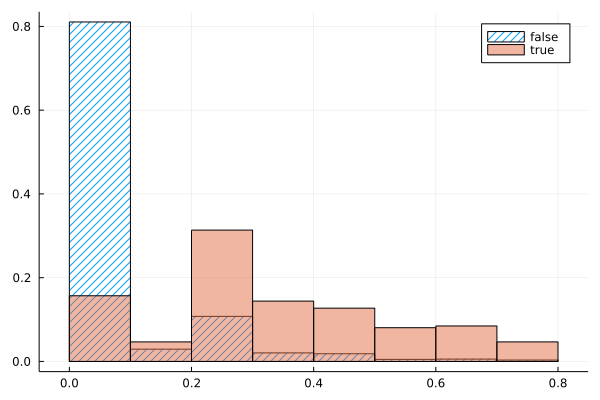

In [73]:
test_groups = groupby(test, :arrest)
histogram(test_groups[(false,)].predict; bins=10, normalize=:probability, fillstyle= :/, label="false")
histogram!(test_groups[(true,)].predict; bins=10, normalize=:probability, fillalpha=0.5, label="true")

In [74]:
@chain test begin
    @rselect(:predicted=:predict > 0.15, :observed=:arrest)
    proptable(:predicted, :observed; margins=2)
end

2×2 Named Matrix{Float64}
predicted ╲ observed │    false      true
─────────────────────┼───────────────────
false                │ 0.811154  0.169492
true                 │ 0.188846  0.830508

In [75]:
test_roc = roc(test; score=:predict, target=:arrest)

ROC curve with 62 points, of which 14 on the convex hull

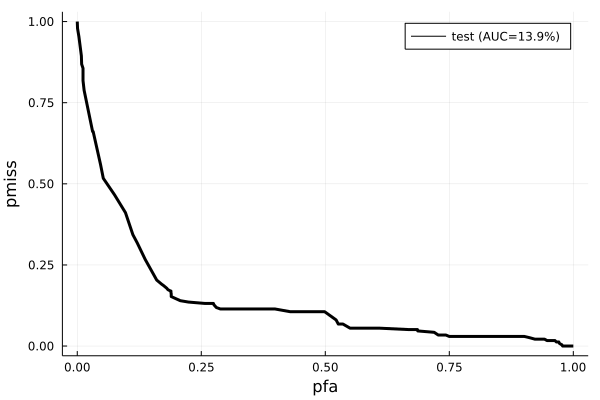

In [76]:
plot(test_roc.pfa, test_roc.pmiss;
    color="black", lw=3,
    label="test (AUC=$(round(100*auc(test_roc), digits=2))%)",
    xlabel="pfa", ylabel="pmiss")

In [77]:
train_roc = roc(train, score=:predict, target=:arrest)

ROC curve with 73 points, of which 16 on the convex hull

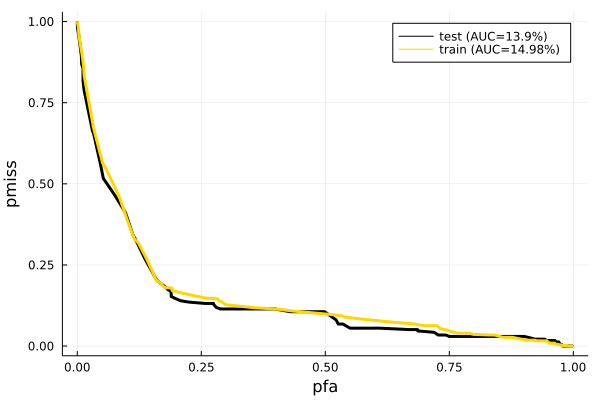

In [78]:
plot!(train_roc.pfa, train_roc.pmiss;
    color="gold", lw=3,
    label="train (AUC=$(round(100*auc(train_roc), digits=2))%)")

### Handling of duplicate column names in DataFrames.jl

In [79]:
DataFrame(:a=>1, :a=>2)

LoadError: ArgumentError: Duplicate variable names: :a. Pass makeunique=true to make them unique using a suffix automatically.

In [80]:
DataFrame(:a=>1, :a=>2; makeunique=true)

,a,a_1
,Int64,Int64
1,1,2
